<a href="https://colab.research.google.com/github/Javierxd1383/MineriaDeDatos/blob/main/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Parcial 1

## Evidencias del examen

### Pregunta 10: Probabilidad Condicional

**Enunciado:**
En una fábrica se producen piezas mediante dos máquinas, **A** y **B**.
* La máquina **A** produce el 60% del total.
* La máquina **B** produce el 40% restante.

**Tasas de error:**
* Máquina **A**: 2% de piezas defectuosas.
* Máquina **B**: 5% de piezas defectuosas.

**Problema:**
Si un inspector toma una pieza al azar y encuentra que está defectuosa, ¿cuál es la probabilidad de que haya sido fabricada por la máquina **B**?

> **Respuesta:** 0.625 (62.5%)

In [8]:
p_a = 0.60
p_b = 0.40

p_defectuosa_dado_a = 0.02
p_defectuosa_dado_b = 0.05

p_defectuosa_total = (p_a * p_defectuosa_dado_a) + (p_b * p_defectuosa_dado_b)


p_b_dado_defectuosa = (p_b * p_defectuosa_dado_b) / p_defectuosa_total

# Mostrar resultados
print(f"Probabilidad total de defectos en la fábrica: {p_defectuosa_total:.4f}")
print(f"Probabilidad de que la pieza defectuosa sea de la Máquina B: {p_b_dado_defectuosa:.4f}")
print(f"Resultado en porcentaje: {p_b_dado_defectuosa * 100:.2f}%")

Probabilidad total de defectos en la fábrica: 0.0320
Probabilidad de que la pieza defectuosa sea de la Máquina B: 0.6250
Resultado en porcentaje: 62.50%


Acontinuación se te presenta una simulación de un caso en el que se pretende determinar si el consumo de café por los estudiantes ayuda a estudiar.

Imagina que seleccionas a 20 estudiantes al azar. A 10 les das café y a otros 10 les das agua, luegos les pides que resuelvan un examen de lógica.



In [9]:
import pandas as pd
import numpy as np

np.random.seed(42)


# 1. Crea una lista de matrículas de estudiantes
student_ids = [f'{i:06d}' for i in range(172120, 172120 + 20)]


# 2. Asigna 10 estudiantes al grupo 'Café' y 10 al grupo 'Agua'
groups = ['Café'] * 10 + ['Agua'] * 10
np.random.shuffle(groups)


# 3. Simula calificacionen de examenes para el grupo café
coffee_scores = np.random.normal(loc=70, scale=5, size=10).round(0)
coffee_scores = np.clip(coffee_scores, 50, 100).astype(int)


# 4. Simula calificaciones de examen para el grupo de 'Agua'
water_scores = np.random.normal(loc=75, scale=5, size=10).round(0)
water_scores = np.clip(water_scores, 50, 100).astype(int)


# Combina los valores basado en el grupo
exam_scores = []
coffee_idx = 0
water_idx = 0
for group in groups:
    if group == 'Café':
        exam_scores.append(coffee_scores[coffee_idx])
        coffee_idx += 1
    else:
        exam_scores.append(water_scores[water_idx])
        water_idx += 1


# 5. Combina en un DataFrame de Pandas
df_students = pd.DataFrame({
    'Matrícula': student_ids,
    'Grupo': groups,
    'Calificaciones': exam_scores
})


print("Datos simulados:")
print(df_students.head())

Datos simulados:
  Matrícula Grupo  Calificaciones
0    172120  Café              77
1    172121  Agua              77
2    172122  Agua              79
3    172123  Café              78
4    172124  Café              58


### Pregunta 13:
Calcula la media (promedio) de las calificaciones de los estudiantes que consumieron agua.

> **Respuesta:** 74.9

### Pregunta 14:
Calcula la media (promedio) de las calificaciones de los estudiantes que consumieron café.

> **Respuesta:** 70.6

In [10]:
# Media del grupo Agua
media_agua = water_scores.mean()

# Media del grupo Café
media_cafe = coffee_scores.mean()

print(f"Resultado Pregunta 13 (Media Agua): {media_agua}")
print(f"Resultado Pregunta 14 (Media Café): {media_cafe}")

# Verificación adicional usando el DataFrame
print("\nVerificación desde el DataFrame:")
print(df_students.groupby('Grupo')['Calificaciones'].mean())

Resultado Pregunta 13 (Media Agua): 74.9
Resultado Pregunta 14 (Media Café): 70.6

Verificación desde el DataFrame:
Grupo
Agua    74.9
Café    70.6
Name: Calificaciones, dtype: float64


### Pregunta 15: Visualización de Distribuciones (Histogramas)
Enunciado:
Elige la pareja de histogramas que representan la distribución de las calificaciones de los grupos de Café y Agua.

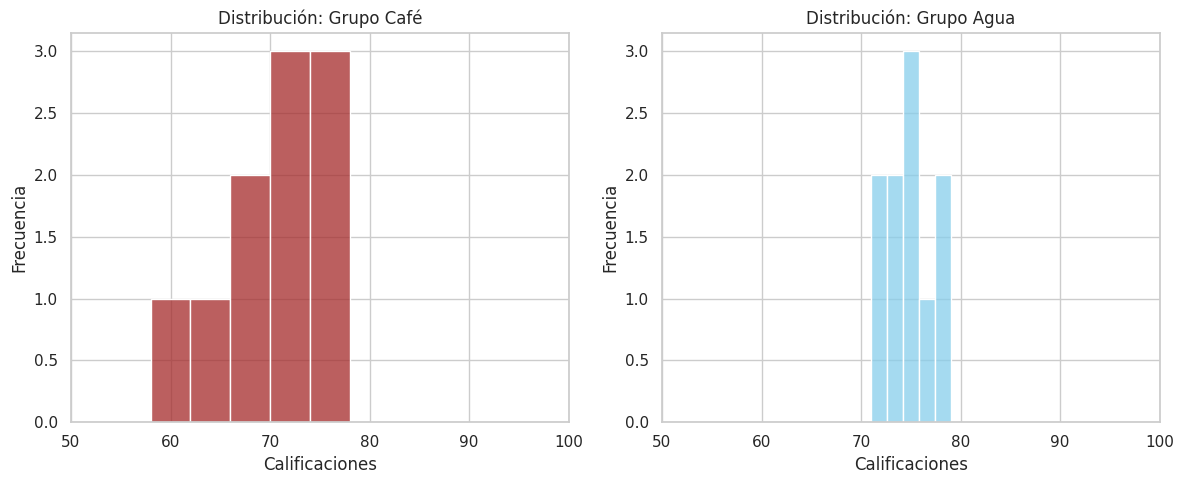

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 5))

# Histograma para el grupo Café (sin línea)
plt.subplot(1, 2, 1)
sns.histplot(coffee_scores, bins=5, color='brown', kde=False)
plt.title('Distribución: Grupo Café')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.xlim(50, 100)

# Histograma para el grupo Agua (sin línea)
plt.subplot(1, 2, 2)
sns.histplot(water_scores, bins=5, color='skyblue', kde=False)
plt.title('Distribución: Grupo Agua')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.xlim(50, 100)

plt.tight_layout()
plt.show()

### Pregunta 19: Probabilidad Condicional con Tabla de Contingencia

**Enunciado:**
A continuación se presenta la tabla de contingencia que relaciona a los estudiantes que tomaron un curso preparatorio frente a su resultado en el examen:

| | Aprobó | Reprobó | Total |
|---|:---:|:---:|:---:|
| **Tomó el curso** | 45 | 5 | 50 |
| **No tomó el curso** | 20 | 30 | 50 |
| **Total** | 65 | 35 | 100 |

**Problema:**
Calcula la probabilidad condicional de aprobar el examen dado que el estudiante tomó el curso.

**Fórmula aplicada:**
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Donde:
* $P(A \cap B)$ es la intersección de quienes aprobaron y tomaron el curso (45).
* $P(B)$ es el total de personas que tomaron el curso (50).

**Cálculo:**
$$P(A|B) = \frac{45}{50} = 0.9$$

> **Respuesta:** 0.9

In [ ]:
# Datos de la tabla
aprobo_y_curso = 45
total_curso = 50

# Cálculo de Probabilidad Condicional P(Aprobar | Tomó Curso)
prob_condicional = aprobo_y_curso / total_curso

print(f"La probabilidad de aprobar dado que tomó el curso es: {prob_condicional}")
print(f"En porcentaje: {prob_condicional * 100}%")

La probabilidad de aprobar dado que tomó el curso es: 0.9
En porcentaje: 90.0%


### Pregunta 20: Probabilidad Simple

**Enunciado:**
Utilizando la misma tabla de contingencia de la pregunta anterior, calcula la probabilidad simple de aprobar el examen.

**Fórmula aplicada:**
$$P(A) = \frac{\text{Casos Favorables}}{\text{Casos Totales}}$$

Donde:
* **Casos Favorables (Aprobó):** 65 (Total de la columna "Aprobó")
* **Casos Totales:** 100 (Gran total de la muestra)

**Cálculo:**
$$P(A) = \frac{65}{100} = 0.65$$

> **Respuesta:** 0.65

In [ ]:
total_aprobaron = 65
total_estudiantes = 100

prob_simple_aprobacion = total_aprobaron / total_estudiantes

print(f"La probabilidad simple de aprobar es: {prob_simple_aprobacion}")

La probabilidad simple de aprobar es: 0.65
